# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_s21/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,582,108,53,104,181,56,11,220,31,25,167,226,712,214,72,15,18,189,199
1,501,105,54,96,185,57,10,219,30,25,170,231,706,217,75,5,12,187,195
2,735,86,37,77,144,54,7,154,43,19,127,179,352,145,71,14,13,186,191
3,534,90,39,57,114,48,7,135,51,18,139,155,261,151,85,12,8,183,182
4,289,88,37,57,132,62,6,135,50,18,125,151,265,144,83,16,16,180,184
5,404,103,48,101,204,62,12,200,33,23,158,215,595,164,66,8,22,192,202
6,107,85,39,77,151,59,8,150,45,19,134,176,331,133,73,0,16,184,193
7,552,90,39,89,181,62,8,175,38,21,132,200,458,154,70,11,15,189,195
8,115,95,47,88,162,64,11,159,43,20,157,176,371,185,71,12,13,189,198
9,496,106,55,98,224,68,11,215,31,24,170,222,679,214,68,2,29,189,201


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,417.202186,93.251366,44.739526,81.746812,167.956284,61.624772,8.661202,168.038251,41.136612,20.517304,147.728597,188.116576,435.684882,174.375228,72.510018,6.193078,12.555556,188.887067,195.586521
std,246.438428,8.079815,6.209504,15.375222,33.550456,8.612364,4.884241,33.281760,7.764644,2.609320,14.511294,31.808062,177.139984,32.821979,7.914598,4.862251,8.971117,6.240467,7.411908
min,2.000000,73.000000,33.000000,44.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,134.000000,193.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,196.000000,87.000000,40.000000,70.000000,141.000000,56.000000,7.000000,146.000000,33.000000,19.000000,136.000000,167.000000,318.000000,148.000000,67.000000,2.000000,5.000000,184.000000,191.000000
50%,420.000000,92.000000,44.000000,79.000000,165.000000,61.000000,8.000000,156.000000,43.000000,19.000000,146.000000,177.000000,359.000000,173.000000,71.000000,5.000000,11.000000,188.000000,196.000000
75%,630.000000,99.000000,49.000000,96.000000,192.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,197.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,115.000000,59.000000,112.000000,333.000000,138.000000,52.000000,265.000000,59.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from scikitplot.metrics import plot_roc
import warnings
warnings.filterwarnings("ignore")

In [7]:
scaler = StandardScaler()
le = LabelEncoder()

In [8]:
# le.fit(y_train)
# y_train_le = le.transform(y_train)
# y_test_le = le.transform(y_test)
y_train_le = y_train
y_test_le = y_test

In [9]:
scaler.fit(data)
X_test_pd = pd.DataFrame(X_test)
X_train_pd_scaled = pd.DataFrame(scaler.transform(X_train_pd))
X_test_pd_scaled = scaler.transform(X_test_pd)

In [10]:
X_train_pd_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.653102,1.740243,1.319820,1.390119,0.360485,-0.722241,0.529004,1.539812,-1.272432,1.705106,1.309788,1.191177,1.540809,1.208116,-0.061767,1.754252,0.605056,0.010937,0.452977
1,0.321433,1.375705,1.481994,0.882576,0.480058,-0.595396,0.311542,1.509715,-1.400524,1.705106,1.516583,1.350533,1.506832,1.300346,0.339166,-0.280151,-0.067140,-0.313722,-0.085062
2,1.279589,-0.933032,-1.274963,-0.322839,-0.745564,-0.975933,-0.340845,-0.446624,0.264661,-0.610954,-1.447489,-0.306770,-0.497833,-0.913182,-0.195411,1.550812,0.044893,-0.476052,-0.623102
3,0.456557,-0.446982,-0.950615,-1.591697,-1.642361,-1.737008,-0.340845,-1.018477,1.289390,-0.996965,-0.620306,-1.071679,-1.013156,-0.728722,1.675609,1.143931,-0.515271,-0.963041,-1.833690
4,-0.546641,-0.690007,-1.274963,-1.591697,-1.104283,0.038833,-0.558308,-1.018477,1.161299,-0.996965,-1.585352,-1.199164,-0.990504,-0.943926,1.408320,1.957693,0.380991,-1.450029,-1.564671


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [11]:
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500.)

In [12]:
param_dist = {
        'C':uniform(loc=0, scale=5),
        'penalty':['l1', 'l2']
        }

In [13]:
clf = RandomizedSearchCV(log_reg, param_dist, random_state=0, cv=5, scoring='roc_auc_ovr')
search = clf.fit(X_train_pd_scaled, y_train_le)
new_params = search.best_params_
print(new_params)

{'C': 4.060843643877466, 'penalty': 'l1'}


In [14]:
log_reg_best = LogisticRegression(multi_class='multinomial', 
                                  solver='saga', 
                                  tol=1e-3, 
                                  max_iter=500., 
                                  **new_params
                                 )

In [15]:
log_reg.fit(X_train_pd_scaled, y_train_le)

LogisticRegression(max_iter=500.0, multi_class='multinomial', solver='saga',
                   tol=0.001)

In [16]:
log_reg_best.fit(X_train_pd_scaled, y_train_le)

LogisticRegression(C=4.060843643877466, max_iter=500.0,
                   multi_class='multinomial', penalty='l1', solver='saga',
                   tol=0.001)

In [17]:
preds_prob = log_reg.predict_proba(X_test_pd_scaled)
preds = log_reg.predict(X_test_pd_scaled)

preds_prob_best = log_reg_best.predict_proba(X_test_pd_scaled)
preds_best = log_reg_best.predict(X_test_pd_scaled)

In [18]:
print("default LogReg:")
print(f"roc_auc_score = {roc_auc_score(y_test_le, preds_prob, multi_class='ovr')}")
print(f"f1_score = {f1_score(y_test_le, preds, average='macro')}")
print("---------------")
print(f"LogReg with {search.best_params_}")
print(f"roc_auc_score = {roc_auc_score(y_test_le, preds_prob_best, multi_class='ovr')}")
print(f"f1_score = {f1_score(y_test_le, preds_best, average='macro')}")

default LogReg:
roc_auc_score = 0.9395847738356065
f1_score = 0.7875599721380704
---------------
LogReg with {'C': 4.060843643877466, 'penalty': 'l1'}
roc_auc_score = 0.9488386658528464
f1_score = 0.8069586718105035


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

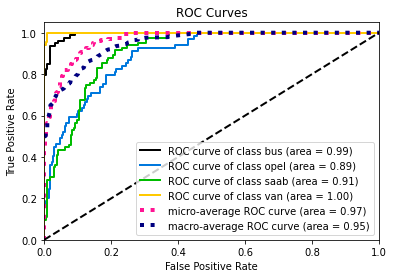

In [19]:
plot_roc(y_test_le, preds_prob_best)

In [20]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [21]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [22]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train_pd_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame({'TARGET': y_train})], axis = 1)

In [23]:
finalDf = pd.concat([principalDf, pd.DataFrame({'TARGET': y_train})], axis = 1)

In [24]:
finalDf['TARGET'].unique()

array(['saab', 'opel', 'van', 'bus'], dtype=object)

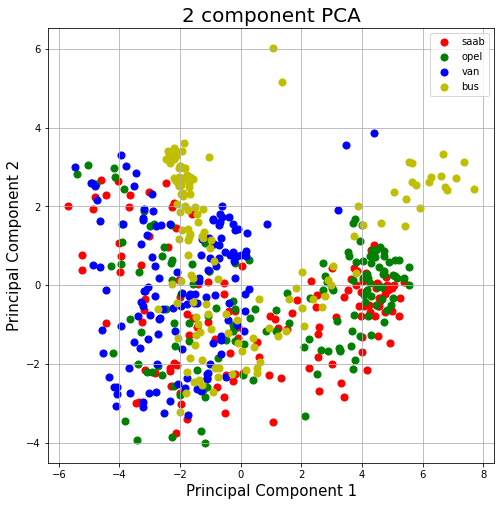

In [25]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = finalDf['TARGET'].unique()
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['TARGET'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [26]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_train_pd_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
finalDf = pd.concat([principalDf, pd.DataFrame({'TARGET': y_train})], axis = 1)

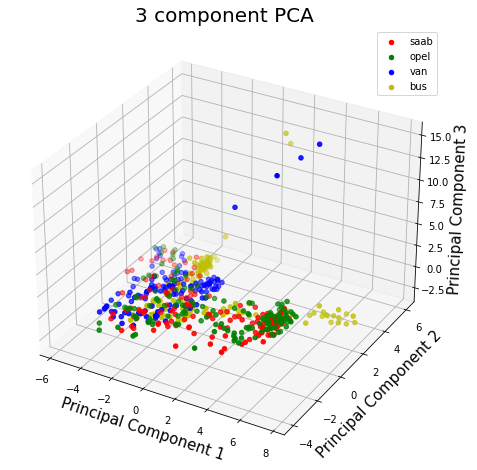

In [27]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = finalDf['TARGET'].unique()
colors = ['r', 'g', 'b', 'y']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['TARGET'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color)
ax.legend(targets)
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [28]:
N_COMP = 4
pca = PCA(n_components=N_COMP)
X_train_pce = pca.fit_transform(X_train_pd_scaled)
X_test_pce = pca.transform(X_test_pd_scaled)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [29]:
from sklearn.pipeline import Pipeline

In [30]:
pipe = Pipeline([('scaler', StandardScaler()) , ('pca', PCA(n_components=5)), ('clf', log_reg)])

In [31]:
param_dist = {
        'pca__n_components':[2, 3, 4, 5],
        'clf__C':uniform(loc=0, scale=5),
        'clf__penalty':['l1', 'l2']
        }

randomized_search = RandomizedSearchCV(pipe, param_dist, random_state=0, cv=5, scoring='roc_auc_ovr')

In [32]:
clf = randomized_search.fit(X_train_pd_scaled, y_train_le)

In [33]:
clf.best_params_

{'clf__C': 3.958625190413323, 'clf__penalty': 'l2', 'pca__n_components': 4}

In [34]:
pipe.set_params(**clf.best_params_)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=4)),
                ('clf',
                 LogisticRegression(C=3.958625190413323, max_iter=500.0,
                                    multi_class='multinomial', solver='saga',
                                    tol=0.001))])

In [35]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=4)),
                ('clf',
                 LogisticRegression(C=3.958625190413323, max_iter=500.0,
                                    multi_class='multinomial', solver='saga',
                                    tol=0.001))])

In [36]:
print(roc_auc_score(y_test, pipe.predict_proba(X_test), multi_class='ovr'))
print(f1_score(y_test, pipe.predict(X_test), average='macro'))

0.7407786051783837
0.4227486559139785


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [37]:
from sklearn.tree import DecisionTreeClassifier

pipe_dtc = Pipeline([('scaler', StandardScaler()) , ('pca', PCA(n_components=5)), ('clf', DecisionTreeClassifier())])

param_dist = {
        'pca__n_components':[5],
        'clf__max_depth':[3,4,5,6,7]
        }

randomized_search = RandomizedSearchCV(pipe_dtc, param_dist, random_state=0, cv=5, scoring='roc_auc_ovr')

In [38]:
grid_search_dtc = randomized_search.fit(X_train_pd_scaled, y_train_le)

In [39]:
grid_search_dtc.best_params_

{'pca__n_components': 5, 'clf__max_depth': 5}

In [40]:
pipe_dtc.set_params(**grid_search_dtc.best_params_)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('clf', DecisionTreeClassifier(max_depth=5))])

In [41]:
pipe_dtc.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('clf', DecisionTreeClassifier(max_depth=5))])

In [42]:
print(roc_auc_score(y_test, pipe_dtc.predict_proba(X_test), multi_class='ovr'))
print(f1_score(y_test, pipe_dtc.predict(X_test), average='macro'))

0.7794635944809175
0.489317871336314


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [43]:
from sklearn.ensemble import BaggingClassifier

bagging_logreg = BaggingClassifier(base_estimator=LogisticRegression(),
                        bootstrap = True,
                        n_estimators=10)

In [44]:
pipe_bagging_logreg = Pipeline([('scaler', StandardScaler()), 
                                ('clf', bagging_logreg)])

In [45]:
%%time
estimators_range = range(2, 100, 5)
f1_list = []
accuracy_list = []
for n_est in estimators_range:
    pipe_bagging_logreg.set_params(clf__n_estimators=n_est)
    pipe_bagging_logreg.fit(X_train, y_train)
    f1_list.append(f1_score(y_test, pipe_bagging_logreg.predict(X_test), average='macro'))
    accuracy_list.append(accuracy_score(y_test, pipe_bagging_logreg.predict(X_test)))

CPU times: user 27.8 s, sys: 116 ms, total: 27.9 s
Wall time: 27.6 s


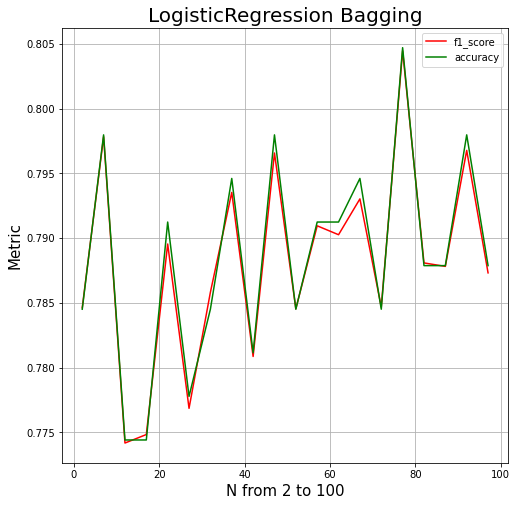

In [46]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('N from 2 to 100', fontsize = 15)
ax.set_ylabel('Metric', fontsize = 15)
ax.set_title('LogisticRegression Bagging', fontsize = 20)
targets = ['f1_score', 'accuracy']
metrics_list = [f1_list, accuracy_list]
colors = ['r', 'g']
for target, color in zip(metrics_list, colors):
    ax.plot(estimators_range
               , target
               , c = color)
ax.legend(targets)
ax.grid()

In [47]:
bagging_dtc = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                        bootstrap = True,
                        n_estimators=10)

In [48]:
pipe_bagging_dtc = Pipeline([('scaler', StandardScaler()), 
                                ('clf', bagging_dtc)])

In [49]:
%%time
estimators_range = range(2, 100, 5)
f1_list = []
accuracy_list = []
for n_est in estimators_range:
    pipe_bagging_dtc.set_params(clf__n_estimators=n_est)
    pipe_bagging_dtc.fit(X_train, y_train)
    f1_list.append(f1_score(y_test, pipe_bagging_dtc.predict(X_test), average='macro'))
    accuracy_list.append(accuracy_score(y_test, pipe_bagging_dtc.predict(X_test)))

CPU times: user 3.51 s, sys: 33.2 ms, total: 3.54 s
Wall time: 3.55 s


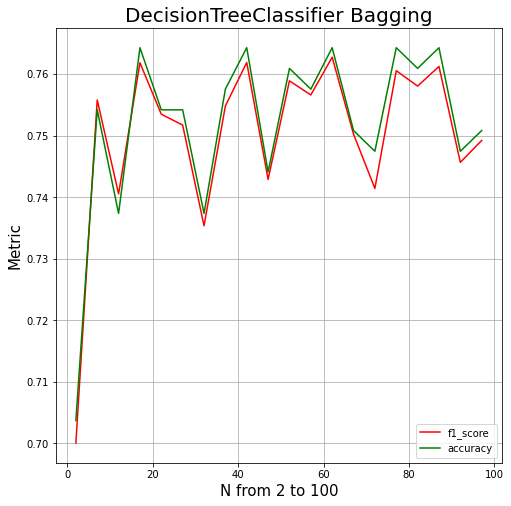

In [50]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('N from 2 to 100', fontsize = 15)
ax.set_ylabel('Metric', fontsize = 15)
ax.set_title('DecisionTreeClassifier Bagging', fontsize = 20)
targets = ['f1_score', 'accuracy']
metrics_list = [f1_list, accuracy_list]
colors = ['r', 'g']
for target, color in zip(metrics_list, colors):
    ax.plot(estimators_range
               , target
               , c = color)
ax.legend(targets)
ax.grid()

В логистической регрессии нет большой разницы при усреднении результатов, потому что каждый раз строится похожая модель, 
а в деревьях получается реализация случайного леса, каждое новое дерево строится по новому, 
поэтому при увеличении количества деревьев модель улучшается

Для беггинга деревьев оптимальные параметры, найденные в 2.5 не оптимальны, потому что подбирали такие параметры, чтобы на тестовой выборке получилась наилуччшая функция потерь, а в случае с беггингом, из-за бутстрепа меняются выборки

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [51]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

In [52]:
pipe_bagging_rtc = Pipeline([('scaler', StandardScaler()), 
                                ('clf', RandomForestClassifier())])

In [53]:
%%time
estimators_range = range(2, 100, 5)
f1_list = []
accuracy_list = []
for n_est in estimators_range:
    pipe_bagging_rtc.set_params(clf__n_estimators=n_est)
    pipe_bagging_rtc.fit(X_train, y_train)
    f1_list.append(f1_score(y_test, pipe_bagging_rtc.predict(X_test), average='macro'))
    accuracy_list.append(accuracy_score(y_test, pipe_bagging_rtc.predict(X_test)))

CPU times: user 1.77 s, sys: 19.3 ms, total: 1.79 s
Wall time: 1.79 s


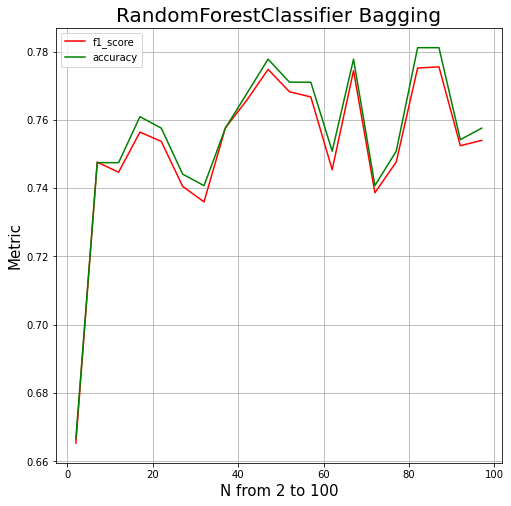

In [54]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('N from 2 to 100', fontsize = 15)
ax.set_ylabel('Metric', fontsize = 15)
ax.set_title('RandomForestClassifier Bagging', fontsize = 20)
targets = ['f1_score', 'accuracy']
metrics_list = [f1_list, accuracy_list]
colors = ['r', 'g']
for target, color in zip(metrics_list, colors):
    ax.plot(estimators_range
               , target
               , c = color)
ax.legend(targets)
ax.grid()

как я и писал выше, результат получился примерно такой же, как с беггингом деревьев, чем больше деревьев, тем лучше

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [55]:
for i in range(0 , X_train.shape[0] + X_train.shape[0] // 10, 55)[1:]:    
    print(X_train[:i].shape)

(55, 19)
(110, 19)
(165, 19)
(220, 19)
(275, 19)
(330, 19)
(385, 19)
(440, 19)
(495, 19)
(549, 19)


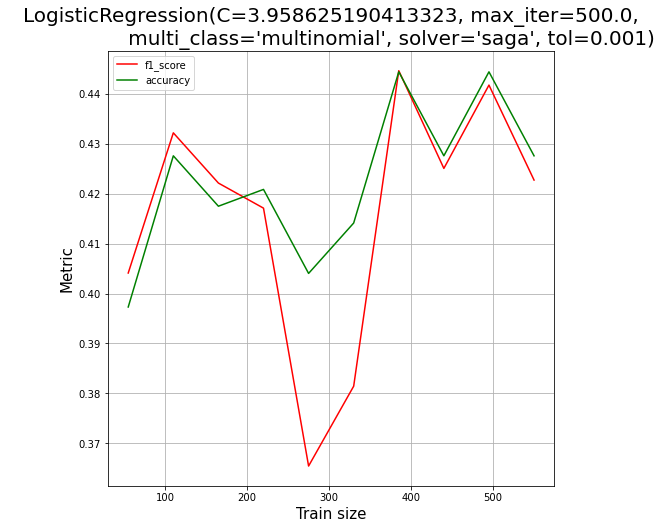

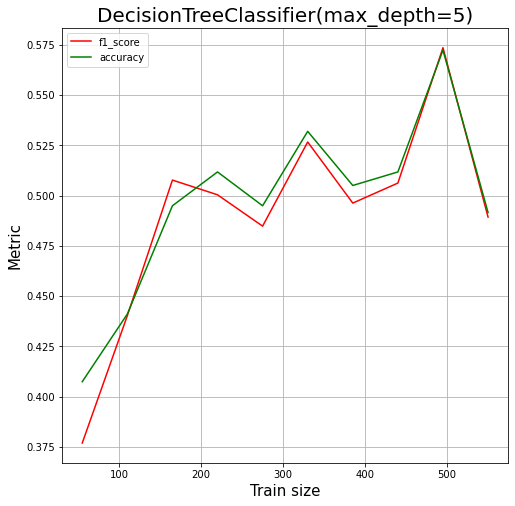

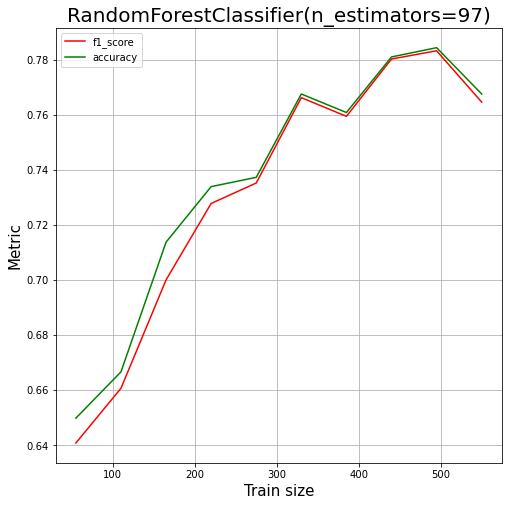

In [56]:
t_size_list = range(0 , X_train.shape[0] + X_train.shape[0] // 10, 55)[1:]

for model in [pipe, pipe_dtc, pipe_bagging_rtc]:
    f1_list = []
    accuracy_list = []
    for t_size in t_size_list:
        X_train_short = X_train[:t_size]
        y_train_short = y_train[:t_size]
        model.fit(X_train_short, y_train_short)
        f1_list.append(f1_score(y_test, model.predict(X_test), average='macro'))
        accuracy_list.append(accuracy_score(y_test, model.predict(X_test)))
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Train size', fontsize = 15)
    ax.set_ylabel('Metric', fontsize = 15)
    ax.set_title(model['clf'], fontsize = 20)
    targets = ['f1_score', 'accuracy']
    metrics_list = [f1_list, accuracy_list]
    colors = ['r', 'g']
    for target, color in zip(metrics_list, colors):
        ax.plot(t_size_list
                   , target
                   , c = color)
    ax.legend(targets)
    ax.grid()

Для случайного леса выбрали модель, в которой больше всего деревьев

По графикам видно, что для моделей с деревьями увеличение выборки 